In [1]:
# Imports
from wNMF import wNMF
import numpy as np
import matplotlib.pyplot as plt   # allows to plot charts
import pandas as pd              
import seaborn as sns    # python data visualization library based on matplotlib
import glob
import pickle
import os 

# To be allow to zoom in on the plots, uncomment the following lines
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

sns.set(style="darkgrid")


In [8]:
# Plots with the standard deviation around the mean
def plotMeanStd(norm_mean, norm_min, norm_max, title, xlabel, ylabel, legendlabel, legendLoc, color):
    LENGTH = norm_mean.shape[0]
    plt.plot(norm_mean, label=legendlabel, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc = legendLoc)
    plt.fill_between(np.linspace(0, LENGTH, LENGTH), norm_min, norm_max ,alpha=0.3, color=color)
    
    
def CastValInt(dataframe):
    dataframe['index'] = dataframe['index'].astype(int)
    
def CastValFloat(dataframe):
    dataframe['norm_min'] = dataframe['norm_min'].astype(float)
    dataframe['norm_mean'] = dataframe['norm_mean'].astype(float)
    dataframe['norm_max'] = dataframe['norm_max'].astype(float)

In [6]:
HipFlexion = pd.read_excel('RealHumanData/HipFlexion.ods', engine='odf')
KneeFlexion = pd.read_excel('RealHumanData/KneeFlexion.ods', engine='odf')
AnkleFlexion = pd.read_excel('RealHumanData/AnkleFlexion.ods', engine='odf')
GroundReactionForces = pd.read_excel('RealHumanData/GroundReactionForces.ods', engine='odf')

# Data formatting
HipFlex = pd.DataFrame(HipFlexion, columns=['index', 'norm_min', 'norm_mean', 'norm_max'])
KneeFlex = pd.DataFrame(KneeFlexion, columns=['index', 'norm_min', 'norm_mean', 'norm_max'])
AnkleFlex = pd.DataFrame(AnkleFlexion, columns=['index', 'norm_min', 'norm_mean', 'norm_max'])
GRF = pd.DataFrame(GroundReactionForces, columns=['index', 'norm_min', 'norm_mean', 'norm_max'])


# Cast val to float
CastValInt(HipFlex)
CastValFloat(HipFlex)
CastValInt(KneeFlex)
CastValFloat(KneeFlex)
CastValInt(AnkleFlex)
CastValFloat(AnkleFlex)
CastValInt(GRF)
CastValFloat(GRF)

# Table of the data
#HipFlex.head()
#KneeFlex.head()
#AnkleFlex.head()
GRF.head()

,index,norm_min,norm_mean,norm_max
0,0,0.00,0.00,0.00
1,1,0.31,0.40,0.49
2,2,0.41,0.52,0.63
3,3,0.45,0.56,0.67
4,4,0.47,0.58,0.70


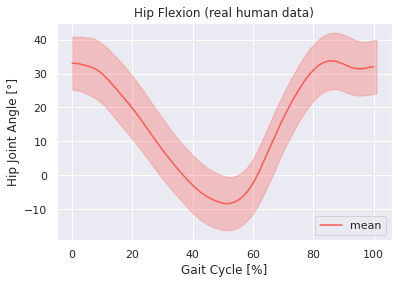

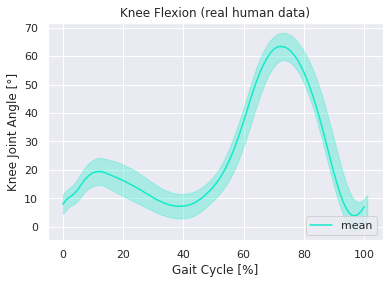

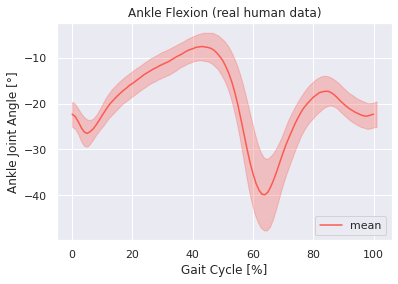

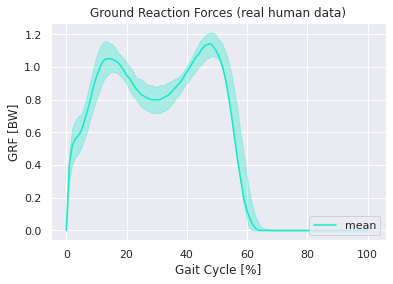

In [7]:
## HIP FLEXION PLOT 
HipFlex_mean = HipFlex['norm_mean']
HipFlex_min = HipFlex['norm_min']
HipFlex_max = HipFlex['norm_max']

KneeFlex_mean = KneeFlex['norm_mean']
KneeFlex_min = KneeFlex['norm_min']
KneeFlex_max = KneeFlex['norm_max']

AnkleFlex_mean = AnkleFlex['norm_mean']
AnkleFlex_min = AnkleFlex['norm_min']
AnkleFlex_max = AnkleFlex['norm_max']

GRF_mean = GRF['norm_mean']
GRF_min = GRF['norm_min']
GRF_max = GRF['norm_max']

# Plots with the standard deviation around the mean
plotMeanStd(HipFlex_mean, HipFlex_min, HipFlex_max, 'Hip Flexion (real human data)', 'Gait Cycle [%]', 'Hip Joint Angle [°]', 'mean', 'lower right', 'xkcd:coral')
plt.show()

plotMeanStd(KneeFlex_mean, KneeFlex_min, KneeFlex_max, 'Knee Flexion (real human data)', 'Gait Cycle [%]', 'Knee Joint Angle [°]', 'mean', 'lower right', 'xkcd:aqua')
plt.show()

plotMeanStd(AnkleFlex_mean, AnkleFlex_min, AnkleFlex_max, 'Ankle Flexion (real human data)', 'Gait Cycle [%]', 'Ankle Joint Angle [°]', 'mean', 'lower right', 'xkcd:coral')
plt.show()

plotMeanStd(GRF_mean, GRF_min, GRF_max, 'Ground Reaction Forces (real human data)', 'Gait Cycle [%]', 'GRF [BW]', 'mean', 'lower right', 'xkcd:aqua')
plt.show()